# 水色图像处理

## 1. 读取数据

### 1.1 获取文件夹中所有图片的名称

In [1]:
import os
path = '../data/water_images/'

In [2]:
imgs_name = os.listdir(path)
len(imgs_name)

197

### 1.2 读取一张图片数据

In [3]:
import cv2

In [4]:
img_name = imgs_name[10]
img = cv2.imread(path + img_name)

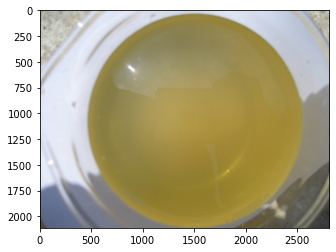

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:,::-1])
plt.show()

### 1.3 读取所有图片数据

In [6]:
imgs, labels = [], []
for index in range(len(imgs_name)):
    img_name = imgs_name[index]
    labels.append(int(img_name[0])) # 获取正确标签
    img = cv2.imread(path + img_name) # 读取图片
    imgs.append(img)

## 2. 图像预处理

In [7]:
for index in range(len(imgs)):
    img = imgs[index]
    height, width = img.shape[:2]
    new_img = img[height//2-50:height//2+50, width//2-50:width//2+50]
    imgs[index] = new_img

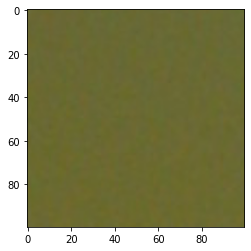

In [8]:
plt.imshow(new_img[:,:,::-1])
plt.show()

## 3. 特征构造

In [9]:
import numpy as np
def get(array):
    array_mean = np.mean(array)
    tmp_data = np.mean((array - array_mean) ** 3)
    return np.sign(tmp_data) * np.abs(tmp_data) ** (1/3)

In [10]:
features = np.zeros([len(imgs), 9])
for index in range(len(imgs)):
    img = imgs[index]
    # 分离图片通道
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    features[index, 0], features[index, 1], features[index, 2] = np.mean(b), np.std(b), get(b)
    features[index, 3], features[index, 4], features[index, 5] = np.mean(g), np.std(g), get(g)
    features[index, 6], features[index, 7], features[index, 8] = np.mean(r), np.std(r), get(r)

In [11]:
features.shape

(197, 9)

In [12]:
labels = np.array(labels)
labels.shape

(197,)

## 4. 模型搭建和训练

### 4.1 切分数据集

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
print(X_train.shape, X_test.shape)

(157, 9) (40, 9)


### 4.2 模型的搭建

In [14]:
from sklearn.ensemble import RandomForestClassifier # 导入随机森林模型
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## 5. 模型的评价

In [15]:
rf_model.score(X_test, y_test)

0.925

## 6. 模型的预测

In [16]:
index = 90

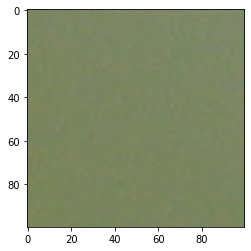

In [17]:
plt.imshow(imgs[index][:,:,::-1])
plt.show()

In [18]:
rf_model.predict(features[index:index+1])[0] == labels[index]

True